# Boston Housing Data Science Project
Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

## Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

## Task 3: Load in the Dataset in your Jupyter Notebook

In [3]:
# Run this command if you have the dataset saved locally on your machine
boston_df=pd.read_csv('boston_housing.csv')

# Run this command instead to get the dataset from the web
# boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## Task 4: Generate Descriptive Statistics and Visualizations

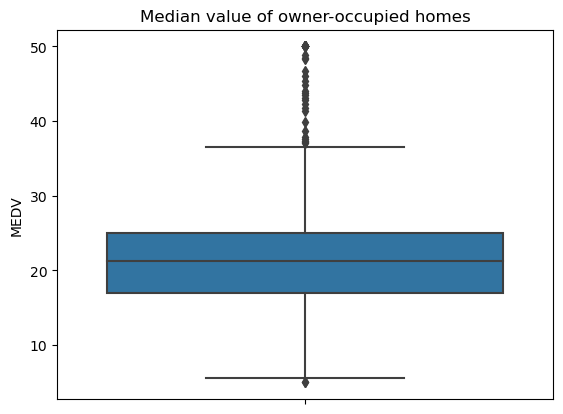

In [29]:
# A box plot for the "Median value of owner-occupied homes"
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')
plt.show()

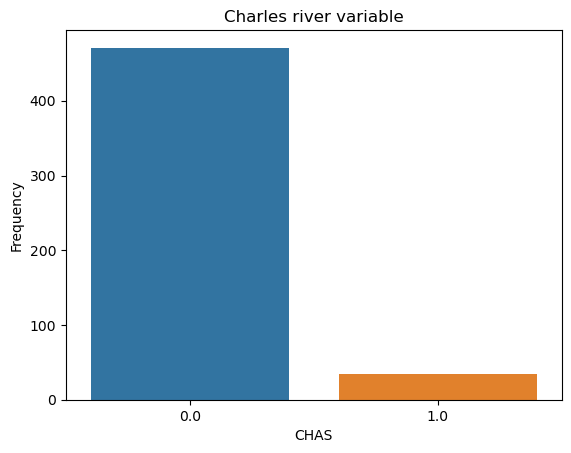

In [30]:
# A  bar plot for the Charles river variable
counts = boston_df['CHAS'].value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.title('Charles river variable')
plt.xlabel('CHAS')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Discretizing the age variable into three groups of 35 years and younger,
# between 35 and 70 years and 70 years and older
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_DISC'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_DISC'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_DISC'] = '70 years and older'

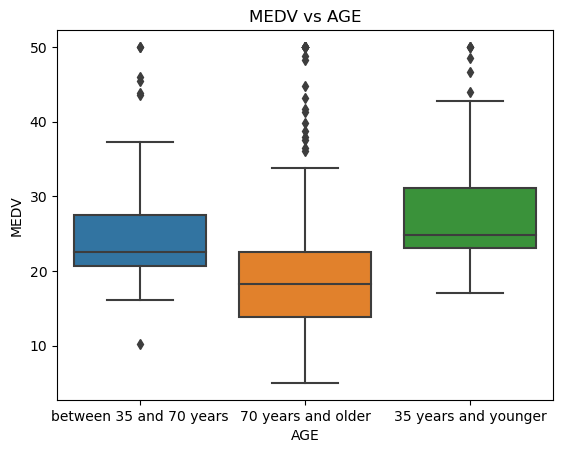

In [32]:
# A boxplot for the MEDV variable vs the AGE variable
sns.boxplot(x='AGE_DISC', y='MEDV', data=boston_df)
plt.title('MEDV vs AGE')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.show()

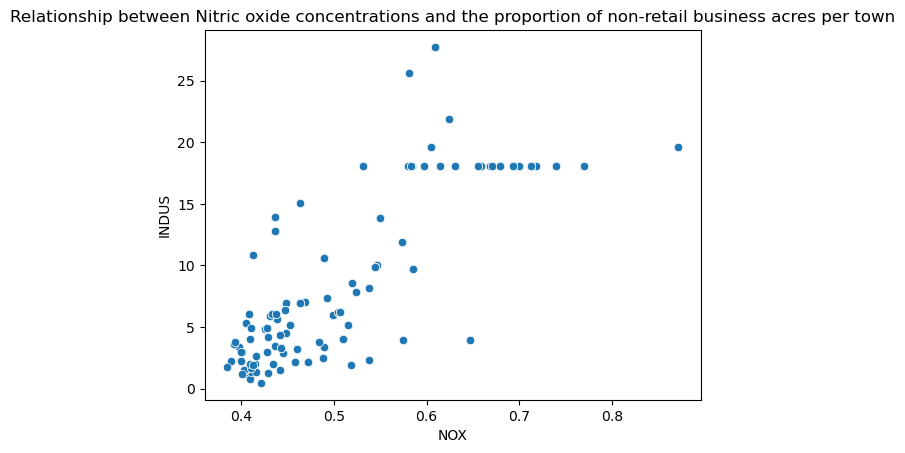

In [21]:
# A scatter plot to show the relationship between
# Nitric oxide concentrations and the proportion of non-retail business acres per town
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.show()
# We can say they have an upward linear relationship

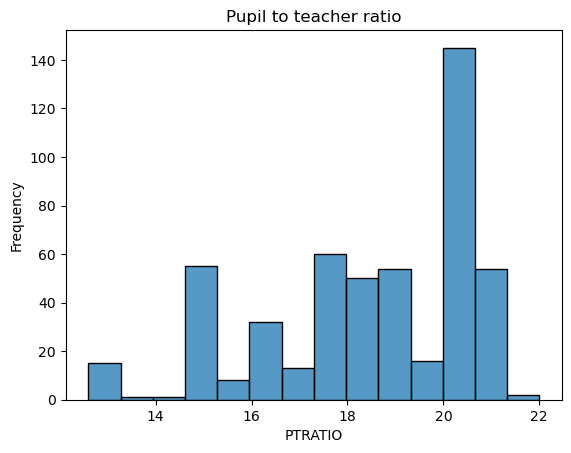

In [33]:
# A histogram for the pupil to teacher ratio variable
sns.histplot(data=boston_df, x='PTRATIO')
plt.title('Pupil to teacher ratio')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

## Task 5: Use the appropriate tests to answer the questions provided.

#### • Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met.

*   One independent, categorical variable with two levels or group
*   One dependent continuous variable
*   Independence of the observations. Each subject should belong to only one group. There is no relationship between the observations in each group.
*   The dependent variable must follow a normal distribution
*   Assumption of homogeneity of variance


Use α = 0.05

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in  median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in  median value of houses bounded by the Charles river or not")


We can plot the dependent variable with a historgram

C:\Users\Karim Nasr\AppData\Local\Temp\ipykernel_3968\3137433311.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution of MEDV'), Text(0, 0.5, 'Frequency')]

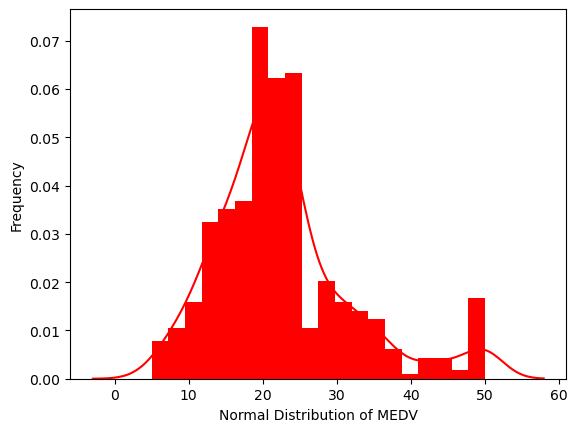

In [24]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution of MEDV', ylabel='Frequency')
## we can assume it is normal

We can use the Levene's Test in Python to check test significance


In [27]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

* since the p-value is less than 0.05 we can't assume the equality of variance.
* Variances are not equal.
* Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library

In [28]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not

#### • Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 a= µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


Test for equality of variance

In [34]:
scipy.stats.levene(boston_df[boston_df['AGE_DISC'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_DISC'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_DISC'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

since the p-value is larger than 0.05, the variance are equal

First, separate the three samples (one for each age category) into a variable each.

In [35]:
thiryfive_younger = boston_df[boston_df['AGE_DISC'] == '35 years and younger']['MEDV']
thiryfive_seventy = boston_df[boston_df['AGE_DISC'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['AGE_DISC'] == '70 years and older']['MEDV']

Now, run a one-way ANOVA.


In [36]:
f_statistic, p_value = scipy.stats.f_oneway(thiryfive_younger, thiryfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.


#### • Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

In [37]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject the Null hypothesis and conclude that there  exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


#### • What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

*   $H\_0: β1$ = 0 (additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes)


In [39]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        07:42:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that additional weighted distance to the five Boston employment centres has an effect on the median value of owner occupied homes. The coefficient 1.0916 means that additional weighted distance to the five Boston employment centres has a positive weight of 1.0916 in affecting the median value of owner occupied homes. The constant 18.3901 means that the affect has an estimated intercept value of 18.3901.

## Project Completed by:
[Karim Nasr](https://www.linkedin.com/in/karim-nasr-abu-al-fath/)

## Portions of this project were inspired by the work of
[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork956-2022-01-01)